In [1]:
import graphviz as gv

### Define some utility functions for working with graphviz:

In [2]:
def graph(styles=None, **kwargs):
    g = gv.Digraph(format='svg', engine='dot.bat', **kwargs)
    if styles:
        g.graph_attr.update(styles)
    return g

def add_nodes(graph, nodes):
    for n in nodes:
        if isinstance(n, tuple):
            graph.node(n[0], **n[1])
        else:
            graph.node(n)
    return graph

def add_edges(graph, edges):
    for e in edges:
        if isinstance(e[0], tuple):
            graph.edge(*e[0], **e[1])
        else:
            graph.edge(*e)
    return graph

def add_edges_reversed(graph, edges):
    for e in edges:
        if isinstance(e[0], tuple):
            graph.edge(*reversed(e[0]), **e[1])
        else:
            graph.edge(*reversed(e))
    return graph

def apply_styles(graph, styles):
    graph.graph_attr.update(
        ('graph' in styles and styles['graph']) or {}
    )
    graph.node_attr.update(
        ('nodes' in styles and styles['nodes']) or {}
    )
    graph.edge_attr.update(
        ('edges' in styles and styles['edges']) or {}
    )
    return graph

### Nodes (with individual styles):

In [3]:
browser_nodes = [
    ('WebGL', dict(style='filled', fillcolor='lightblue')),
    ('ThreeJS', dict(style='filled', fillcolor='lightblue')),
    ('x3dom', dict(style='filled', fillcolor='lightblue')),
    ('vtk.js', dict(style='filled', fillcolor='lightblue')),
    'GlowScript',
    'K3D',
    ('ParaViewWeb', dict(style='filled', fillcolor='beige')),
    ('SciviJS', dict(style='filled', fillcolor='beige')),
]

kernel_nodes = [
    'PyThreeJS',
    'Mayavi',
    'VisPy.gloo',
    'K3D-Jupyter',
    'VPython',
    'Sage.plot3d',
    'IPyVolume',
    'VisPy.scene'
]

### Dependencies:

In [4]:
web_intra_dependencies = [
    ('ThreeJS', 'WebGL'),
    ('x3dom', 'WebGL'),
    ('vtk.js', 'WebGL'),
    ('GlowScript', 'WebGL'),
    ('K3D', 'ThreeJS'),
    ('ParaViewWeb', 'ThreeJS'),
    ('ParaViewWeb', 'vtk.js'),
    ('SciviJS', 'ThreeJS'),
]

kernel_intra_dependencies = [
    ('IPyVolume', 'PyThreeJS'),
    ('VisPy.scene', 'VisPy.gloo'),
]

# Labels define how the two sides communicate:
kernel_browser_dependencies = [
    (('PyThreeJS', 'ThreeJS'), {'label': 'IPyWidgets sync'}),
    (('Mayavi', 'x3dom'), {'label': 'Static HTML'}),
    (('VisPy.gloo', 'WebGL'), {'label': 'Comm'}),
    (('K3D-Jupyter', 'K3D'), {'label': 'IPyWidgets sync'}),
    (('VPython', 'GlowScript'), {'label': 'Comm'}),
    (('Sage.plot3d', 'ThreeJS'), {'label': 'Static HTML'}),
]

### Combine into a graph with two clusters:

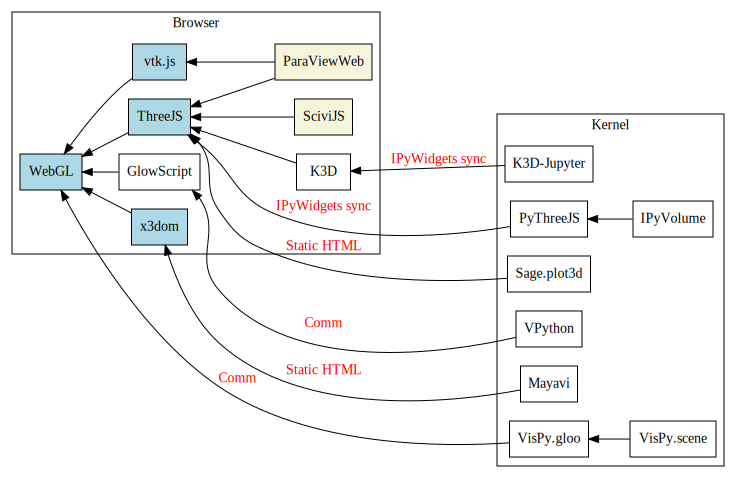

In [5]:
g_browser = apply_styles(
    add_nodes(graph(name='cluster0'), browser_nodes),
    {
        'graph': {
            'label': 'Browser',
        },
        'nodes': {
            'shape': 'record',
        }
    }
)
g_kernel = apply_styles(
    add_nodes(graph(name='cluster1'), kernel_nodes),
    {
        'graph': {
            'label': 'Kernel',
        },
        'nodes': {
            'shape': 'record',
        }
    }
)

add_edges_reversed(g_browser, web_intra_dependencies)
add_edges_reversed(g_kernel, kernel_intra_dependencies)

g = apply_styles(
    graph(),
    {
        'graph': dict(rankdir='LR'),
        'edges': dict(fontcolor='red', dir='back')
    }
)
g.subgraph(g_browser)
g.subgraph(g_kernel)
add_edges_reversed(g, kernel_browser_dependencies)

### Output:

Run to save as `dependencies.svg`:

In [6]:
g.render(filename='dependencies')

'dependencies.svg'

Run to output DOT graph syntax as text:

In [7]:
print(g)

digraph {
	graph [rankdir=LR]
	edge [dir=back fontcolor=red]
		subgraph cluster0 {
			graph [label=Browser]
			node [shape=record]
				WebGL [fillcolor=lightblue style=filled]
				ThreeJS [fillcolor=lightblue style=filled]
				x3dom [fillcolor=lightblue style=filled]
				"vtk.js" [fillcolor=lightblue style=filled]
				GlowScript
				K3D
				ParaViewWeb [fillcolor=beige style=filled]
				SciviJS [fillcolor=beige style=filled]
					WebGL -> ThreeJS
					WebGL -> x3dom
					WebGL -> "vtk.js"
					WebGL -> GlowScript
					ThreeJS -> K3D
					ThreeJS -> ParaViewWeb
					"vtk.js" -> ParaViewWeb
					ThreeJS -> SciviJS
		}
		subgraph cluster1 {
			graph [label=Kernel]
			node [shape=record]
				PyThreeJS
				Mayavi
				"VisPy.gloo"
				"K3D-Jupyter"
				VPython
				"Sage.plot3d"
				IPyVolume
				"VisPy.scene"
					PyThreeJS -> IPyVolume
					"VisPy.gloo" -> "VisPy.scene"
		}
			ThreeJS -> PyThreeJS [label="IPyWidgets sync"]
			x3dom -> Mayavi [label="Static HTML"]
			WebGL -> "VisPy.gloo" [l